# Analiza podataka iz eksperimenta

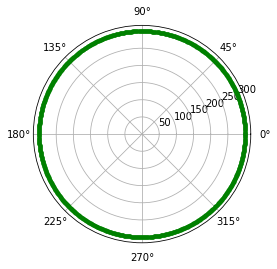

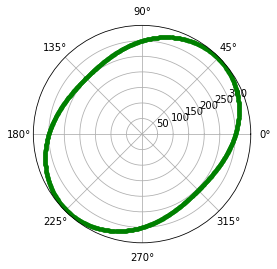

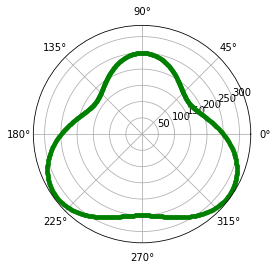

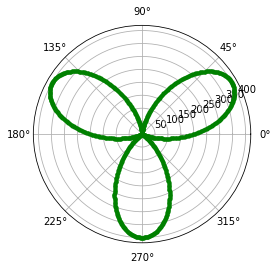

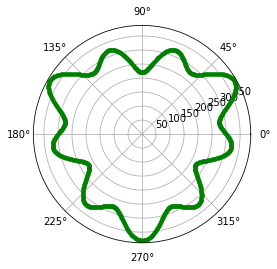

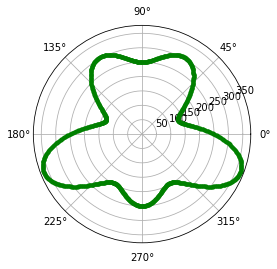

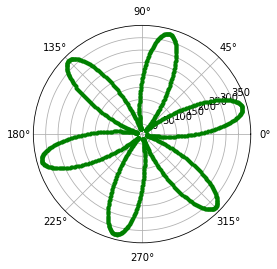

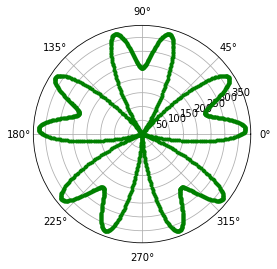

Lenght:  5.533833322621728


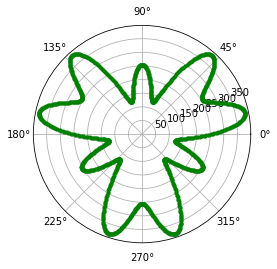

Lenght:  3.6744483767906635


In [2]:
import glob
import xlsxwriter
import ipynb.fs.full.functions as functions
import sympy as sp
import numpy as np

x = sp.Symbol('x')
FOLDER = "user_input/*.txt"
HEADERS = ["username","function", "function_difficulty","pointing_device", "time[s]", "error_rate"]

functions = {
    "e1": functions.easy_fun1,
    "e2": functions.easy_fun2,
    "e3": functions.easy_fun3,
    
    "m1": functions.medium_fun1,
    "m2": functions.medium_fun2,
    "m3": functions.medium_fun3,
    
    "h1": functions.hard_fun1,
    "h2": functions.hard_fun2,
    "h3": functions.hard_fun3,
}

## Obrada podataka iz datoteka

In [3]:
def format_data():
    file_list = glob.glob(FOLDER)
    data = []
    data.append(HEADERS)
    
    for i in file_list:
        points = []
        pointer = ""
        time = 0
        error_rate = 0

        f = open(i, "r")

        username = i.replace("user_input\\", "").replace(".txt", "")[:-3]
        username = username.partition('_')[0]
        function = i.replace("user_input\\", "").replace(".txt", "")[-2:]
        
        lines = f.readlines()
        counter = 1
        for l in lines:
            if counter == 1:
                pointer = l[:-1]
            elif counter == 2:
                time = l[:-1]
            else:
                point = l.split()
                point[0] = float(point[0])
                point[1] = float(point[1])
                points.append(point)

            counter += 1
        error_rate = calculate_error(function, points)
        data.append([username, function,function[0], pointer, time, error_rate])

    return data

## Obrada podataka u oblik pogodan za statističku analizu

In [79]:
def format_data_for_analysis(variable, data):
    
    headers = ["username", "finger_e", "finger_m", "finger_h",
              "stilus_e", "stilus_m", "stilus_h",
              "mouse_e", "mouse_m", "mouse_h"]
    f_data = []
    f_data.append(headers)
    index = 5
    if variable == 'time':
        index = 4
        
    usernames = []
    for i in range(1, len(data)): 
        usernames.append(data[i][0])

    usernames = list(dict.fromkeys(usernames))

    counter = 0
    
    for i in usernames:
        finger_e_arr = []
        finger_m_arr = []
        finger_h_arr = []

        stilus_e_arr = []
        stilus_m_arr = []
        stilus_h_arr = []

        mouse_e_arr = []
        mouse_m_arr = []
        mouse_h_arr = []
        
        finger_e = 0
        finger_m = 0
        finger_h = 0

        stilus_e = 0
        stilus_m = 0
        stilus_h = 0

        mouse_e = 0
        mouse_m = 0
        mouse_h = 0
        counter = 0 
        for j in range(1, len(data)): 
            if data[j][0] == i:
                if data[j][3] == 'Finger':
                    if data[j][2] == "e":
                        finger_e_arr.append(float(data[j][index]))
                    elif data[j][2] == "m":
                        finger_m_arr.append(float(data[j][index]))
                    elif data[j][2] == "h":
                        finger_h_arr.append(float(data[j][index]))
                if data[j][3] == 'Mouse':
                    if data[j][2] == "e":
                        mouse_e_arr.append(float(data[j][index]))
                    elif data[j][2] == "m":
                        mouse_m_arr.append(float(data[j][index]))
                    elif data[j][2] == "h":
                        mouse_h_arr.append(float(data[j][index]))
                if data[j][3] == 'Stilus':
                    if data[j][2] == "e":
                        stilus_e_arr.append(float(data[j][index]))
                    elif data[j][2] == "m":
                        stilus_m_arr.append(float(data[j][index]))
                    elif data[j][2] == "h":
                        stilus_h_arr.append(float(data[j][index]))
        
        finger_e = sum(finger_e_arr) / len(finger_e_arr)
        finger_m = sum(finger_m_arr) / len(finger_m_arr)
        finger_h = sum(finger_h_arr) / len(finger_h_arr)
        
        mouse_e = sum(mouse_e_arr) / len(mouse_e_arr)
        mouse_m = sum(mouse_m_arr) / len(mouse_m_arr)
        mouse_h = sum(mouse_h_arr) / len(mouse_h_arr)
        
        stilus_e = sum(stilus_e_arr) / len(stilus_e_arr)
        stilus_m = sum(stilus_m_arr) / len(stilus_m_arr)
        stilus_h = sum(stilus_h_arr) / len(stilus_h_arr)
        
        f_data.append([i, finger_e, finger_m, finger_h, stilus_e, stilus_m, stilus_h, 
                      mouse_e, mouse_m, mouse_h])
        
    return f_data
    

## Izračun greške

In [4]:
def calculate_error(function_label, points):
    function_expr = functions[function_label]
    
    fun = sp.lambdify(x, function_expr(), "numpy")
    num_of_points = len(points)
    err_i = []
    for p in points:
        r = p[0]
        theta = p[1]
        if theta < 0:
            theta += 2 * np.pi
        real_r = fun(theta)
        err_i.append(np.abs(r - real_r))
    
    error = 0
    for i in err_i:
        error += i
        
    error = error / num_of_points
    
    return error

## Pohrana podataka u excel

In [5]:
def save_to_xlsx_file(data, name):
    workbook = xlsxwriter.Workbook(name)
    worksheet = workbook.add_worksheet()
    counter = 0
    for i in data:
        worksheet.write_row(counter, 0, i)
        counter += 1
        
    workbook.close()

## Pokretanje analize

In [82]:
data = format_data()
time_data = format_data_for_analysis("time", data)
error_data = format_data_for_analysis("error", data)
save_to_xlsx_file(time_data, "time_data.xlsx")
save_to_xlsx_file(error_data, "error_data.xlsx")